<a href="https://colab.research.google.com/github/dakrworld/Math-152/blob/main/Exploration_2_(part_2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

For the second and last part of our exploration, we analyze the rate of convergence of Newton's method. We should qualify this statement, though. Given a guess x, the rate of convergence of x is the number of iterations of Newton's method before the sequence associated with x converges to a root of the function being considered (which is the same as in the first part). That is, if x is the first term of the sequence, the rate of convergence is the number of terms that separate it from the first term that is a root. 

As in the first part, we start by modelling Newton's method. We do this somewhat differently this time. Consider the following function:


In [2]:
def newton(x,n):
  j=0
  while j<n:
    x=x-((x**3+x**2-2*x)/(3*x**2+2*x-2))
    j=j+1
  return x

It takes a complex number x and a natural number n as its inputs, and returns the nth term of the sequence associated with x as its output. 

If all we cared about were the rates of convergence of individual complex numbers, then we'd be done. We, however, want to analyze the rates of conergence of large numbers of complex numbers. For this, we need the following functions:

In [42]:
def newton_one(x):
  j=1
  while newton(x,j)!=1:
    j=j+1
    if j>30:
      return None
  return j
def newton_zero(x):
  j=1
  while newton(x,j)!=0:
    j=j+1
    if j>30:
      return None
  return j
def newton_negtwo(x):
  j=1
  while newton(x,j)!=-2:
    j=j+1
    if j>30:
      return None
  return j



All three do roughly the same thing, but for different roots. Thus, we can get the whole picture just by looking at one of them. Consider newton_one(n). It takes as its input a complex number. It then checks the first thirty terms of the sequence associated with x. If any of those terms equal 1, the sequence converges to the root 1; and so 1 is returned. If none of the thirty terms equal 1, then it can be safely said that the sequence does not converge to 1. (Based on our observations, complex numbers a reasonable distance from 1 virtually always converge to 1 within 30 iterations if they converge to 1 at all. Thus, we feel this is an appropriate way to determining whether a number converges to a root. Of course, large values of x that are far from 1 may take a considerable number of iterations to convergen to 1. In this case, the code can be adjusted accordingly.) Analogious statements can be made about the other two functions. 

Nest, we use these funtions to the rates of convergence of the complex numbers whose real and imaginary parts are between 0 and 10 (we can consider any square subset of the complex plane. Just adjust the ranges below accordingly). How we do this is, we think, clear: consider each point, compute its rate of convergence, and then add it to a list (L, in this case).

In [37]:

G=[]
for x in range(0,10):
  for y in range(0,10):
    G.append(x+y*1j)
L=[]
for s in G:
  if newton_one(s)!=None:
    L.append(newton_one(s))
  if newton_zero(s)!=None:
    L.append(newton_zero(s))
  if newton_negtwo(s)!=None:
    L.append(newton_negtwo(s))              

At this point, we have a list of rates of converge. To tease out any patterns, we plot these values using a histogram:

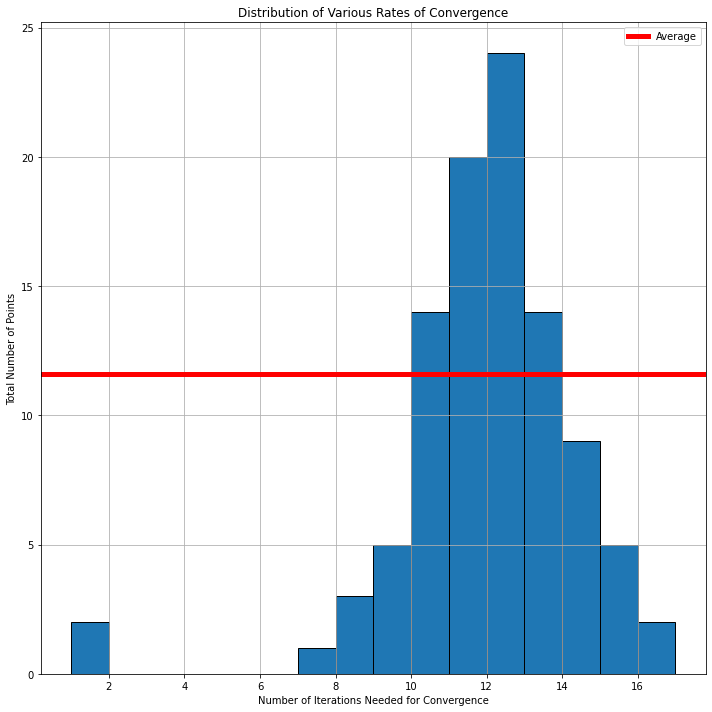

In [43]:
bins=list(range(1,max(L)))
average=sum(L)/len(L)

plt.figure(figsize=(10,10))
plt.hist(L, bins, edgecolor='black') # Divide the range of numbers into 10 "bins".
plt.grid()
plt.title("Distribution of Various Rates of Convergence")
plt.xlabel("Number of Iterations Needed for Convergence")
plt.ylabel("Total Number of Points")
plt.tight_layout()
plt.axhline(average, color='red', linewidth=5, label='Average')
plt.legend()
plt.show()

The distribution appears to be roughly normal